# Project Name: House Loan Data Analysis


## OBJECTIVE-


#### Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv("loan_data (1).csv")


In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
df.isna().sum()


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Print percentage of default to payer of the dataset for the TARGET column


In [8]:
defaulters=(df["TARGET"]==1).sum()
payers=(df["TARGET"]==0).sum()
defaulter_percent=(defaulters/payers)*100
print("Percentage of default to payer is ",defaulter_percent)


Percentage of default to payer is  8.781828601345662


## Balance the dataset if the data is imbalanced


In [9]:
df["TARGET"].value_counts()


0    282686
1     24825
Name: TARGET, dtype: int64

Text(0.5, 1.0, 'Checking whether the dataset is balanced ot not')

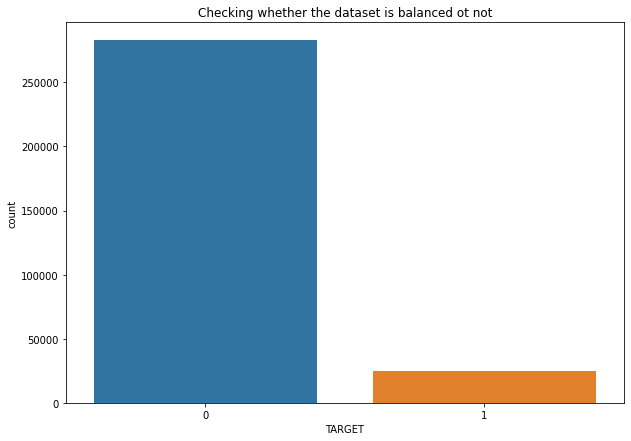

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(df["TARGET"])
plt.title("Checking whether the dataset is balanced ot not")


<AxesSubplot:>

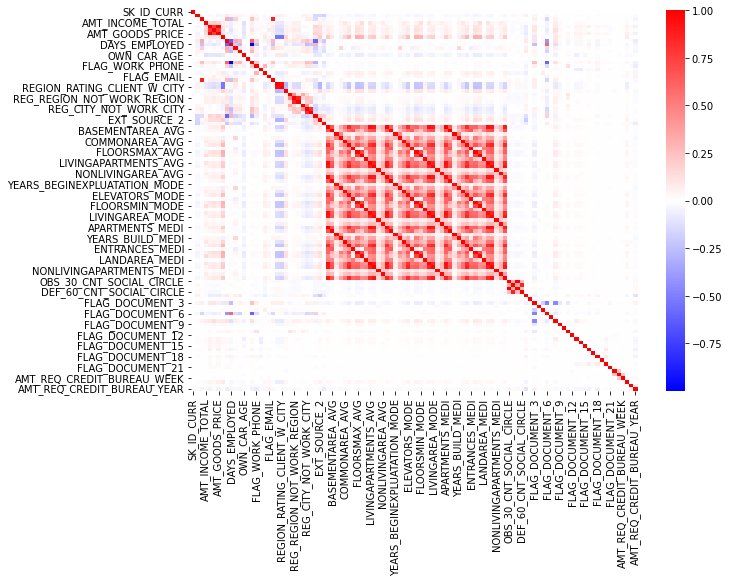

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),cmap="bwr")


## Balance the dataset using under-fitting random sampling


In [12]:
shuffled_df=df.sample(frac=1,random_state=25)
fraud_df=shuffled_df[shuffled_df["TARGET"]==1]
nonfraud_df=shuffled_df[shuffled_df["TARGET"]==0].sample(n=24825,random_state=25)
balanced_df=pd.concat([fraud_df,nonfraud_df])


Text(0.5, 1.0, 'Checking whether the dataset is balanced ot not')

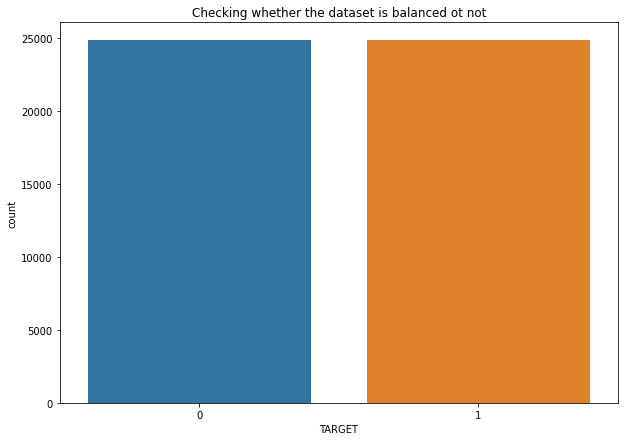

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(balanced_df["TARGET"])
plt.title("Checking whether the dataset is balanced ot not")


<AxesSubplot:>

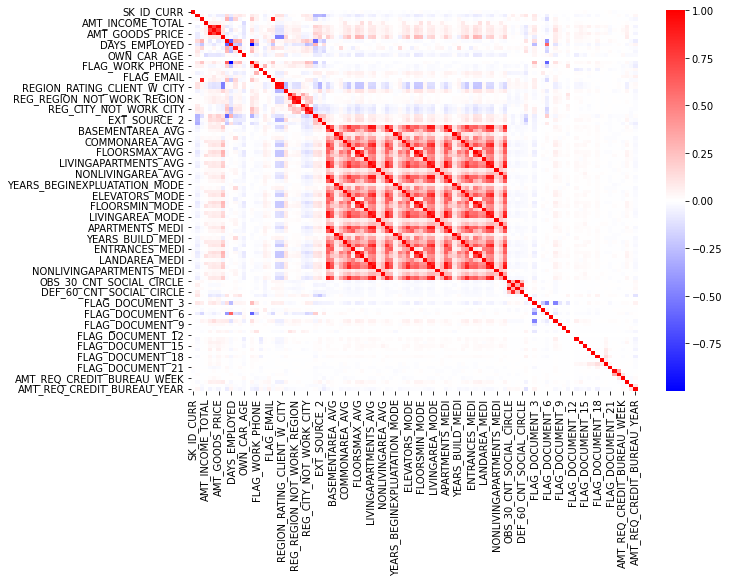

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(balanced_df.corr(),cmap="bwr")


In [15]:
balanced_df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
122136,241602,1,Cash loans,F,N,Y,0,66600.0,808650.0,31464.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
32365,137520,1,Cash loans,M,Y,Y,0,135000.0,512064.0,25033.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
95288,210632,1,Cash loans,M,Y,N,0,180000.0,1078200.0,31522.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
243096,381398,1,Cash loans,F,Y,Y,1,117000.0,539100.0,27652.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
61628,171473,1,Cash loans,M,N,Y,0,180000.0,900000.0,57649.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
balanced_df.describe(include="object")


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,49650,49650,49650,49650,49470,49650,49650,49650,49650,35402,49650,49650,14589,23116,22791,24411
unique,2,2,2,2,7,6,5,5,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
freq,45558,30740,33534,34232,40400,27857,36986,30843,43361,10110,8921,11771,11107,22655,10097,23997


In [17]:
balanced_df.drop(columns=(["WEEKDAY_APPR_PROCESS_START","FLAG_OWN_REALTY","NAME_TYPE_SUITE","FONDKAPREMONT_MODE","EMERGENCYSTATE_MODE"]),inplace=True)
balanced_df.describe(include="object")


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE
count,49650,49650,49650,49650,49650,49650,49650,35402,49650,23116,22791
unique,2,2,2,6,5,5,6,18,58,3,7
top,Cash loans,F,N,Working,Secondary / secondary special,Married,House / apartment,Laborers,Business Entity Type 3,block of flats,"Stone, brick"
freq,45558,30740,33534,27857,36986,30843,43361,10110,11771,22655,10097


## Encode the columns that is required for the model


In [18]:
from sklearn.preprocessing import LabelEncoder


In [19]:
le=LabelEncoder()
balanced_df["NAME_CONTRACT_TYPE"]=le.fit_transform(balanced_df["NAME_CONTRACT_TYPE"])
balanced_df["CODE_GENDER"]=le.fit_transform(balanced_df["CODE_GENDER"])
balanced_df["FLAG_OWN_CAR"]=le.fit_transform(balanced_df["FLAG_OWN_CAR"])
balanced_df["NAME_INCOME_TYPE"]=le.fit_transform(balanced_df["NAME_INCOME_TYPE"])
balanced_df["NAME_EDUCATION_TYPE"]=le.fit_transform(balanced_df["NAME_EDUCATION_TYPE"])
balanced_df["NAME_FAMILY_STATUS"]=le.fit_transform(balanced_df["NAME_FAMILY_STATUS"])
balanced_df["NAME_HOUSING_TYPE"]=le.fit_transform(balanced_df["NAME_HOUSING_TYPE"])
balanced_df["OCCUPATION_TYPE"]=le.fit_transform(balanced_df["OCCUPATION_TYPE"])
balanced_df["ORGANIZATION_TYPE"]=le.fit_transform(balanced_df["ORGANIZATION_TYPE"])
balanced_df["HOUSETYPE_MODE"]=le.fit_transform(balanced_df["HOUSETYPE_MODE"])
balanced_df["NAME_CONTRACT_TYPE"]=le.fit_transform(balanced_df["NAME_CONTRACT_TYPE"])
balanced_df["WALLSMATERIAL_MODE"]=le.fit_transform(balanced_df["WALLSMATERIAL_MODE"])

In [20]:
balanced_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 122136 to 68357
Columns: 117 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(52)
memory usage: 45.9 MB


In [21]:
balanced_df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
122136,241602,1,0,0,0,0,66600.0,808650.0,31464.0,675000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
32365,137520,1,0,1,1,0,135000.0,512064.0,25033.5,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
95288,210632,1,0,1,1,0,180000.0,1078200.0,31522.5,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
243096,381398,1,0,0,1,1,117000.0,539100.0,27652.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
61628,171473,1,0,1,0,0,180000.0,900000.0,57649.5,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
x=balanced_df.drop(["TARGET"],axis=1)
y=balanced_df[["TARGET"]]


In [23]:
x.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
122136,241602,0,0,0,0,66600.0,808650.0,31464.0,675000.0,2,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
32365,137520,0,1,1,0,135000.0,512064.0,25033.5,360000.0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
95288,210632,0,1,1,0,180000.0,1078200.0,31522.5,900000.0,5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
243096,381398,0,0,1,1,117000.0,539100.0,27652.5,450000.0,5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
61628,171473,0,1,0,0,180000.0,900000.0,57649.5,900000.0,5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
y.head()


,TARGET
122136,1
32365,1
95288,1
243096,1
61628,1


In [25]:
from sklearn.model_selection import train_test_split


In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)


In [27]:
x_train.shape,x_test.shape


((37237, 116), (12413, 116))

In [28]:
y_train.shape,y_test.shape


((37237, 1), (12413, 1))

In [31]:
from sklearn.preprocessing import StandardScaler


In [32]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)


## Architect the Deep learning Model


In [33]:
import tensorflow as tf


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


In [35]:
model=Sequential()
model.add(Dense(256,activation="relu",input_shape=(x_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid"))


In [36]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               29952     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [37]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [38]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)


Epoch 1/100
1164/1164 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.5005 - val_loss: nan - val_accuracy: 0.4984
Epoch 2/100
1164/1164 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5005 - val_loss: nan - val_accuracy: 0.4984
Epoch 3/100
1164/1164 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5005 - val_loss: nan - val_accuracy: 0.4984
Epoch 4/100
1164/1164 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5005 - val_loss: nan - val_accuracy: 0.4984
Epoch 5/100
1164/1164 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5005 - val_loss: nan - val_accuracy: 0.4984
Epoch 6/100
1164/1164 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5005 - val_loss: nan - val_accuracy: 0.4984
Epoch 7/100
1164/1164 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.5005 - val_loss: nan - val_accuracy: 0.4984
Epoch 8/100
1164/1164 [====

In [39]:
pred=(model.predict(x_test)>0.5)*1.0
pred


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [40]:
from sklearn.metrics import confusion_matrix,classification_report


In [41]:
print(confusion_matrix(pred,y_test))


[[6187 6226]
 [   0    0]]


In [42]:
print(classification_report(pred,y_test))


              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67     12413
         1.0       0.00      0.00      0.00         0

    accuracy                           0.50     12413
   macro avg       0.50      0.25      0.33     12413
weighted avg       1.00      0.50      0.67     12413



## Calculate Sensitivity as a metrics


In [43]:
print("Sensitivity of the dataset is",6187/(0+6187))


Sensitivity of the dataset is 1.0


## Calculate area under receiver operating characteristics curve


In [44]:
from sklearn.metrics import roc_curve


In [45]:
fpr,tpr,thresholds=roc_curve(pred,y_test)
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)


[0.         0.50157093 1.        ]


[nan nan nan]


[2 1 0]
